In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in csv file
game_info_df=pd.read_csv("../data/boardgames_07022021.csv")
# remove duplicate games
game_info_df.drop_duplicates(subset=['objectid'], inplace=True)
# choose the attributes which have numerical datatype
game_info_df=game_info_df[['average', 'yearpublished',  'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight','numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast',  'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt']].copy()
# drop the null rows
game_info_df.dropna(inplace=True)
# remove the rows which have invalid values
game_info_df.drop(game_info_df[game_info_df['average'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplayers'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['minplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['maxplaytime'] ==0].index, inplace = True)
game_info_df.drop(game_info_df[game_info_df['totalvotes'] ==0].index, inplace = True)
game_info_df.head()

,average,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,totalvotes,languagedependence,usersrated,...,podcast,boardgamedesigner_cnt,boardgameartist_cnt,boardgamepublisher_cnt,boardgamehonor_cnt,boardgamecategory_cnt,boardgamemechanic_cnt,boardgameexpansion_cnt,boardgameversion_cnt,boardgamefamily_cnt
0,8.77503,2017,1,4,60,120,14,1171,4,44354,...,147,1,3,12,30,5,20,12,23,12
1,8.60721,2015,2,4,60,60,13,668,4,43007,...,170,2,1,11,30,2,8,0,33,7
2,8.66981,2018,2,4,60,120,14,521,1,21618,...,28,3,3,14,18,3,9,0,16,9
3,8.42870,2016,1,5,120,120,12,1800,3,68412,...,163,1,1,25,39,6,11,21,35,8
4,8.68957,2017,3,6,240,480,14,335,4,14385,...,53,3,1,11,2,8,14,3,12,5


In [3]:
# Get the general idea about the dataset value range
game_info_df.describe().T

,count,mean,std,min,25%,50%,75%,max
average,19316.0,6.448354,0.923534,1.0,5.885825,6.48070,7.063608,9.5
yearpublished,19316.0,1984.922189,203.982472,-3500.0,1998.000000,2010.00000,2016.000000,2022.0
minplayers,19316.0,2.008128,0.676124,1.0,2.000000,2.00000,2.000000,10.0
maxplayers,19316.0,5.440930,13.146152,1.0,4.000000,4.00000,6.000000,999.0
minplaytime,19316.0,69.816007,472.459600,1.0,20.000000,37.00000,60.000000,60000.0
maxplaytime,19316.0,96.815749,558.755905,1.0,30.000000,45.00000,90.000000,60000.0
minage,19316.0,9.688704,3.611765,0.0,8.000000,10.00000,12.000000,25.0
totalvotes,19316.0,17.054670,67.723891,1.0,2.000000,4.00000,9.000000,2108.0
languagedependence,19316.0,1.669704,1.373367,0.0,1.000000,1.00000,3.000000,5.0
usersrated,19316.0,923.496946,3721.562843,1.0,57.000000,139.00000,449.000000,104891.0


## Select features, Create Train Test Split, Scale the data

In [4]:
# Set features (X) and target (y)
y=game_info_df['average']
X=game_info_df.drop(['average'],axis=1)
X.shape, y.shape

((19316, 32), (19316,))

In [5]:
feature_names=X.columns
feature_names

Index(['yearpublished', 'minplayers', 'maxplayers', 'minplaytime',
       'maxplaytime', 'minage', 'totalvotes', 'languagedependence',
       'usersrated', 'stddev', 'avgweight', 'numweights', 'numgeeklists',
       'numtrading', 'numwanting', 'numcomments', 'siteviews', 'numplays',
       'numplays_month', 'news', 'blogs', 'weblink', 'podcast',
       'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt'],
      dtype='object')

In [6]:
# Create a Train Test Split (20/80)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.2,random_state=101)
X_train.shape, y_train.shape

((3863, 32), (3863,))

In [20]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_trans = np.log1p(y_train)
y_test_trans = np.log1p(y_test)

## RandomeForestRegressor

Training Data Score: 0.95421
Testing Data Score: 0.66360


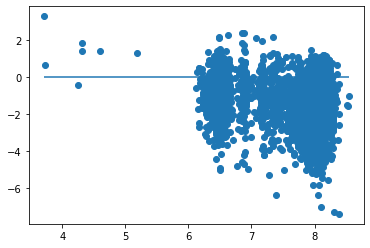

In [8]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test):.5f}")
predictions = rf.predict(X)
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

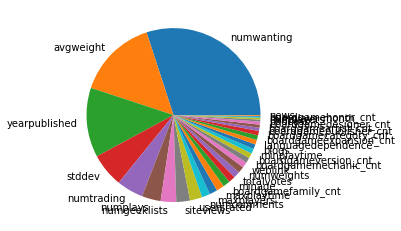

[(0.30012673750368646, 'numwanting'),
 (0.14929268611902335, 'avgweight'),
 (0.12921796601216995, 'yearpublished'),
 (0.06301305453516107, 'stddev'),
 (0.04955108352328727, 'numtrading'),
 (0.03507752371046379, 'numplays'),
 (0.028879657035099742, 'numgeeklists'),
 (0.025378657724624904, 'siteviews'),
 (0.022776410939553755, 'usersrated'),
 (0.015406294073701341, 'numcomments'),
 (0.01466564126232407, 'maxplayers'),
 (0.014616161981894634, 'maxplaytime'),
 (0.013226311924027465, 'boardgamefamily_cnt'),
 (0.012273986905334384, 'minage'),
 (0.012107198623192579, 'totalvotes'),
 (0.011870170588932017, 'numweights'),
 (0.01046545529434859, 'weblink'),
 (0.0099045053677172, 'boardgamemechanic_cnt'),
 (0.009336372427852046, 'boardgameversion_cnt'),
 (0.009222582759528019, 'minplaytime'),
 (0.008736055720826981, 'blogs'),
 (0.008686920580218072, 'languagedependence'),
 (0.008645114132275799, 'boardgameexpansion_cnt'),
 (0.008255124367173322, 'boardgamecategory_cnt'),
 (0.005866652359632539, '

In [9]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
plt.pie([a[0] for a in rf_feature_importance],labels=[a[1] for a in rf_feature_importance],normalize=True)
plt.show()
rf_feature_importance

## DecisionTreeRegressor

Training Data Score: 1.00000
Testing Data Score: 0.27697


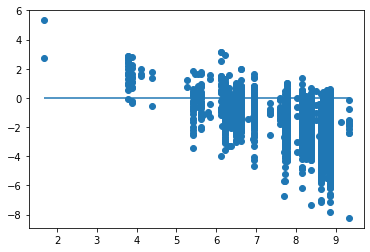

In [10]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train)
dtr.score(X_train_scaled, y_train)
print(f"Training Data Score: {dtr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dtr.score(X_test_scaled, y_test):.5f}")
predictions = dtr.predict(X)
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

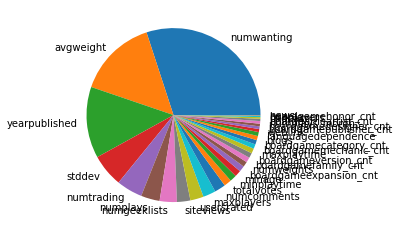

[(0.3002311181361051, 'numwanting'),
 (0.14748782174568992, 'avgweight'),
 (0.13256927102623206, 'yearpublished'),
 (0.060895617461739014, 'stddev'),
 (0.04836575467423496, 'numtrading'),
 (0.03480696786745058, 'numplays'),
 (0.03200787778217222, 'numgeeklists'),
 (0.024850641321823436, 'siteviews'),
 (0.024800086182869337, 'usersrated'),
 (0.02355915904084087, 'maxplayers'),
 (0.020676393888984124, 'numcomments'),
 (0.013987514649312346, 'totalvotes'),
 (0.012416973917151252, 'minplaytime'),
 (0.011775724608615604, 'minage'),
 (0.010873921777751526, 'boardgameexpansion_cnt'),
 (0.00968024387402057, 'numweights'),
 (0.009495490547104858, 'boardgamefamily_cnt'),
 (0.00928226936896942, 'boardgameversion_cnt'),
 (0.009173643418816274, 'maxplaytime'),
 (0.008333932889810417, 'boardgamemechanic_cnt'),
 (0.008148110915414253, 'boardgamecategory_cnt'),
 (0.007844901183174657, 'blogs'),
 (0.007337870246727689, 'languagedependence'),
 (0.005600332989695034, 'weblink'),
 (0.00499169843667486, 'b

In [11]:
importances = dtr.feature_importances_
dtr_feature_importance=sorted(zip(importances, feature_names), reverse=True)
plt.pie([a[0] for a in dtr_feature_importance],labels=[a[1] for a in dtr_feature_importance])
plt.show()
dtr_feature_importance

k: 1, Train/Test Score: 1.000/-0.149
k: 3, Train/Test Score: 0.639/0.237
k: 5, Train/Test Score: 0.558/0.308
k: 7, Train/Test Score: 0.523/0.334
k: 9, Train/Test Score: 0.500/0.348
k: 11, Train/Test Score: 0.486/0.356
k: 13, Train/Test Score: 0.471/0.362
k: 15, Train/Test Score: 0.459/0.365
k: 17, Train/Test Score: 0.452/0.366
k: 19, Train/Test Score: 0.443/0.368
k: 21, Train/Test Score: 0.438/0.370
k: 23, Train/Test Score: 0.432/0.370
k: 25, Train/Test Score: 0.427/0.370
k: 27, Train/Test Score: 0.423/0.370
k: 29, Train/Test Score: 0.422/0.370


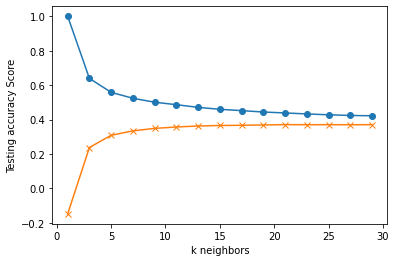

In [12]:
from sklearn.neighbors import KNeighborsRegressor
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train_scaled, y_train)
    train_score = knr.score(X_train_scaled, y_train)
    test_score = knr.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## DummyRegressor

Training Data Score: 0.00000
Testing Data Score: -0.00033


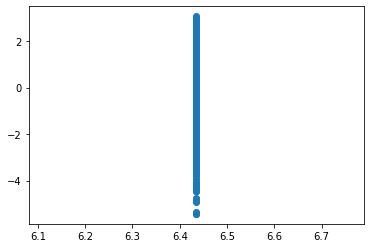

In [18]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr = dummy_regr.fit(X_train_scaled, y_train)
print(f"Training Data Score: {dummy_regr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {dummy_regr.score(X_test_scaled, y_test):.5f}")
predictions = dummy_regr.predict(X)
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

## GaussianProcessRegressor

Training Data Score: 0.39768
Testing Data Score: 0.39402


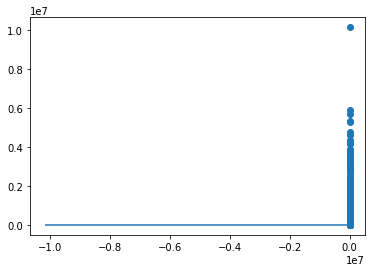

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train_scaled, y_train)
print(f"Training Data Score: {gpr.score(X_train_scaled, y_train):.5f}")
print(f"Testing Data Score: {gpr.score(X_test_scaled, y_test):.5f}")
predictions = gpr.predict(X)
# Plot Residuals
plt.scatter(y, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

## RandomeForest/DecisionTreeRegressor with log/exp transformation

Training Data Score: 0.95068
Testing Data Score: 0.62482


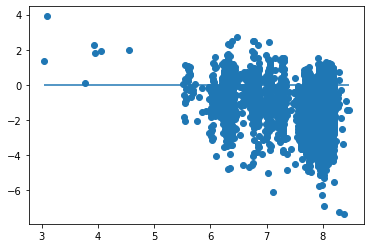

In [26]:
from sklearn.ensemble import RandomForestRegressor
 # Create a random forest regressor
rf = RandomForestRegressor(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train_trans)
print(f"Training Data Score: {rf.score(X_train_scaled, y_train_trans):.5f}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test_trans):.5f}")
predictions = np.expm1(rf.predict(X))
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

Training Data Score: 1.00000
Testing Data Score: 0.24313


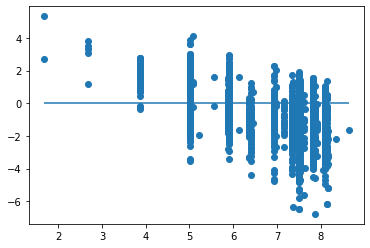

In [27]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(X_train_scaled, y_train_trans)
print(f"Training Data Score: {dtr.score(X_train_scaled, y_train_trans):.5f}")
print(f"Testing Data Score: {dtr.score(X_test_scaled, y_test_trans):.5f}")
predictions =np.expm1(dtr.predict(X))
# Plot Residuals
plt.scatter(predictions, -predictions + y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()